In [364]:
using JLD
using DataFrames
using Statistics
using Plots
pyplot();

include("visualization.jl");

## ARX

In [120]:
# Signal lengths
NT = [25, 50, 100, 200, 400, 800, 1600, 3200]
NE = length(NT)

# Number of repetitions
num_repeats = 100

results_dict = Dict()
results_array = zeros(NE,5)
for (i,n) in enumerate(NT)

    RMS_FEM = load("results/results-ARX_FEM_M5_deg1_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-ARX_RLS_M5_deg1_S"*string(n)*".jld", "RMS")
    
    results_dict[n] = [mean(RMS_FEM); mean(RMS_RLS)]
    
    results_array[i,1] = n
    results_array[i,2] = mean(RMS_FEM)
    results_array[i,3] = std(RMS_FEM) / num_repeats
    results_array[i,4] = mean(RMS_RLS)
    results_array[i,5] = std(RMS_RLS) / num_repeats
    
end

df = DataFrame(results_dict)
sort!(df)

,25,50,100,200,400,800,1600,3200
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.034846,0.0336726,0.0334606,0.0330755,0.0337131,0.0337985,0.0336952,0.0332664
2,0.0387664,0.0366053,0.0342802,0.0334262,0.0338284,0.0338247,0.0337004,0.0332682


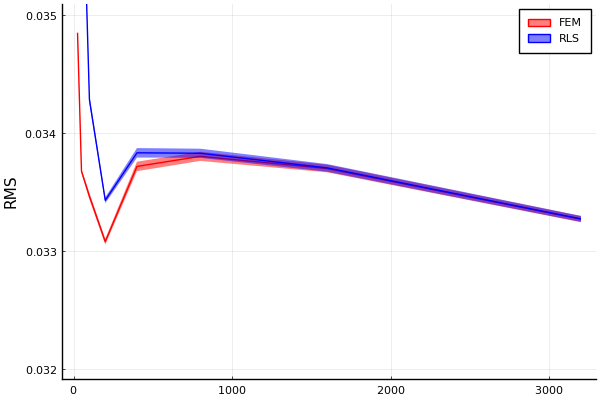

In [121]:
plot(results_array[:,1], 
     results_array[:,2], 
     ribbon=[results_array[:,3] results_array[:,3]], 
     color="red", 
     label="FEM", 
     ylabel="RMS",
#      xscale=:log10,
     ylims=[0.032, 0.035])
plot!(results_array[:,1], 
     results_array[:,4], 
     ribbon=[results_array[:,5] results_array[:,5]], 
     color="blue", 
     label="RLS")

In [122]:
savefig("figures/RMS-ARX.png")

## NARX

In [373]:
# Signal lengths
# NT = [50, 100, 200, 400, 800, 1600]
NT = [50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = 3

# Number of repetitions
num_repeats = 1000

results_array = zeros(NE,4)
results_diffs = zeros(NE,2)
for (i,n) in enumerate(NT)

    # Load
    RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(deg)*"_S"*string(n)*".jld", "RMS")
    
    ΔRMS = RMS_RLS .- RMS_FEM
    
    # Filter outliers, infinities and NaNs
    RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
    RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
    ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))
    
    # Populate RMS array
    results_array[i,1] = mean(RMS_FEM)
    results_array[i,2] = std(RMS_FEM) / sqrt(num_repeats)
    results_array[i,3] = mean(RMS_RLS)
    results_array[i,4] = std(RMS_RLS) / sqrt(num_repeats)
    
    # Populate RMS difference array
    results_diffs[i,1] = mean(ΔRMS)
    results_diffs[i,2] = std(ΔRMS) / sqrt(num_repeats)
    
end

df = DataFrame(results_dict)

,50,100,200,400,800,1600
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0110514,0.0109221,0.0106636,0.0104258,0.0104082,0.0102936
2,0.0180194,0.0133634,0.0110705,0.0107046,0.0107766,0.0107204


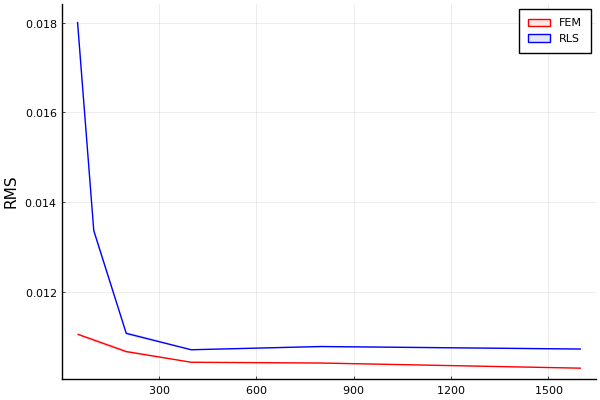

In [375]:
p2 = plot(NT, 
          results_array[:,1], 
          ribbon=[results_array[:,2] results_array[:,2]], 
          color="red", 
          label="FEM", 
#      xscale=:log10,
#           ylims=[0.032, 0.035],
          fillalpha=0.1,
          ylabel="RMS",)
plot!(NT, 
     results_array[:,3], 
     ribbon=[results_array[:,4] results_array[:,4]], 
     color="blue", 
     fillalpha=0.1,
     label="RLS")

In [376]:
savefig(p2, "figures/RMS-NARX.png")

## Comparing multiple degrees

In [399]:
# Signal lengths
NT = [50, 100, 200, 400, 800, 1600]
NE = length(NT)

deg = [1,2,3,4]
ND = length(deg)

# Number of repetitions
num_repeats = 100

results_array = zeros(4, NE, ND)
results_diffs = zeros(2, NE, ND)
for d in deg
    for (i,n) in enumerate(NT)

        RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        RMS_RLS = load("results/results-NARX_RLS_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
        
        ΔRMS = RMS_FEM .- RMS_RLS

        # Filter outliers, infinities and NaNs
        RMS_FEM = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_FEM)))
        RMS_RLS = filter(x -> x<1., filter(!isinf, filter(!isnan, RMS_RLS)))
        ΔRMS = filter(x -> x<1., filter(!isinf, filter(!isnan, ΔRMS)))

        results_array[1,i,d] = tmean(RMS_FEM, tr=0.05)
        results_array[2,i,d] = trimse(RMS_FEM, tr=0.05)
        results_array[3,i,d] = tmean(RMS_RLS, tr=0.05)
        results_array[4,i,d] = trimse(RMS_RLS, tr=0.05)
        
        results_diffs[1,i,d] = tmean(ΔRMS, tr=0.05)
        results_diffs[2,i,d] = trimse(ΔRMS, tr=0.05)

#         results_array[1,i,d] = mean(RMS_FEM)
#         results_array[2,i,d] = std(RMS_FEM) / sqrt(num_repeats)
#         results_array[3,i,d] = mean(RMS_RLS)
#         results_array[4,i,d] = std(RMS_RLS) / sqrt(num_repeats)
    
#         results_diffs[i,1] = mean(ΔRMS)
#         results_diffs[i,2] = std(ΔRMS) / sqrt(num_repeats)
    end
end

In [400]:
results_array[1,:,:]

6×4 Array{Float64,2}:
 0.024515   0.0119431  0.0109871  0.0111322
 0.0230337  0.0113643  0.0107637  0.0107089
 0.0237922  0.0111538  0.0105432  0.0104631
 0.0229603  0.011197   0.0104177  0.0103134
 0.0237637  0.0112213  0.010386   0.0102772
 0.0243439  0.0113522  0.010288   0.0103034

In [401]:
results_array[3,:,:]

6×4 Array{Float64,2}:
 0.0255027  0.0171572  0.0175558  0.0173175
 0.0234138  0.0133994  0.0131953  0.0130855
 0.0243457  0.0118256  0.010941   0.0108247
 0.0233545  0.0116184  0.0106869  0.0105861
 0.0246933  0.0114887  0.0107362  0.0106647
 0.0253138  0.0116036  0.0106757  0.0109354

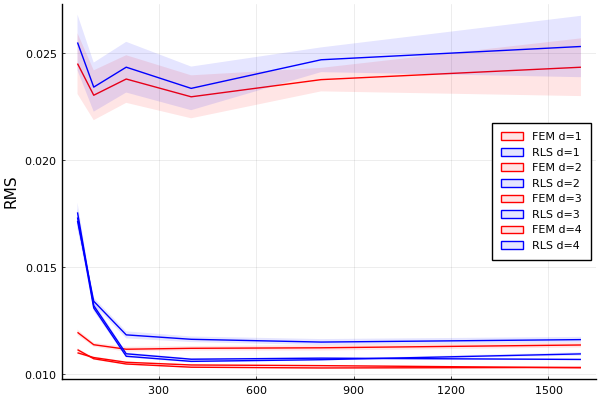

In [402]:
alpha = 0.1

p3 = plot()
for deg in [1,2,3,4]

    plot!(NT, results_array[1,:,deg], 
          ribbon=[results_array[2,:,deg] results_array[2,:,deg]], 
          color="red", 
          label="FEM d="*string(deg), 
          fillalpha=alpha,
          ylabel="RMS")
    plot!(NT, results_array[3,:,deg], 
          ribbon=[results_array[4,:,deg] results_array[4,:,deg]], 
          color="blue", 
          fillalpha=alpha,
          label="RLS d="*string(deg))
end
plot!()

In [403]:
savefig(p3, "figures/RMS-NARX_all-degrees.png")

#### Bar charts

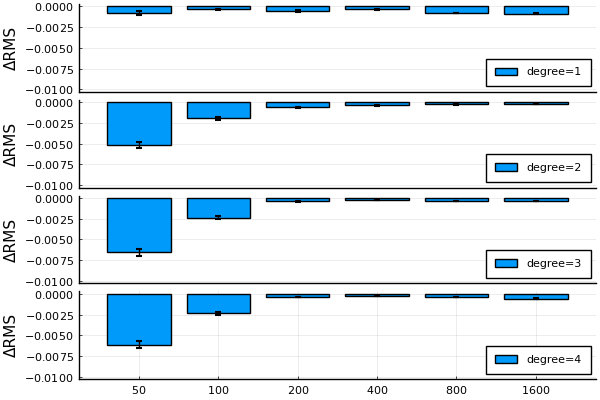

In [405]:
p4a = bar(results_diffs[1,:,1], yerr=results_diffs[2,:,1], ylabel="ΔRMS", label="degree=1", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4b = bar(results_diffs[1,:,2], yerr=results_diffs[2,:,2], ylabel="ΔRMS", label="degree=2", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4c = bar(results_diffs[1,:,3], yerr=results_diffs[2,:,3], ylabel="ΔRMS", label="degree=3", ylims=[-0.01, 0.], legend=:bottomright, xticks=:none)
p4d = bar(results_diffs[1,:,4], yerr=results_diffs[2,:,4], ylabel="ΔRMS", label="degree=4", ylims=[-0.01, 0.], legend=:bottomright, xticks=(1:NE, NT))
p4 = plot(p4a, p4b, p4c, p4d, layout=(4,1), size=(600,400))

In [406]:
savefig(p4, "figures/errorbars_RMS-NARX_all-degrees.png")

#### Checking normality

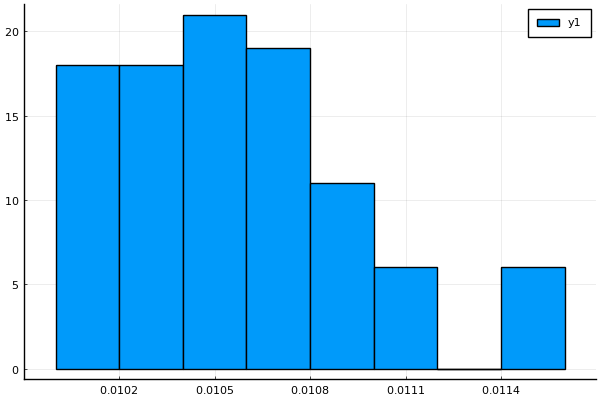

In [407]:
d = 3
n = 200
RMS_FEM = load("results/results-NARX_FEM_M5_degree"*string(d)*"_S"*string(n)*".jld", "RMS")
# histogram(RMS_FEM)
histogram(winval(RMS_FEM, tr=0.05))